In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)
k_indices = build_k_indices(y, 4, 1)
k_indices

array([[27, 35, 40, 38,  2,  3, 48, 29, 46, 31, 32, 39],
       [21, 36, 19, 42, 49, 26, 22, 13, 41, 17, 45, 24],
       [23,  4, 33, 14, 30, 10, 28, 44, 34, 18, 20, 25],
       [ 6,  7, 47,  1, 16,  0, 15,  5, 11,  9,  8, 12]])

In [4]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # get k'th subgroup in test, others in train
    # ***************************************************
    te_idx = k_indices[k-1]
    tr_idx = np.concatenate([k_indices[0:k-1],k_indices[k+1:len(k_indices)]]).ravel()
    te_x = x[te_idx]
    te_y = y[te_idx]
    tr_x = x[tr_idx]
    tr_y = y[tr_idx]
    # ***************************************************
    # form data with polynomial degree
    # ***************************************************
    te_phi = build_poly(te_x,degree)
    tr_phi = build_poly(tr_x,degree)
    # ***************************************************
    # ridge regression
    # ***************************************************
    weight,mse = ridge_regression(tr_y, tr_phi, lambda_)
    # ***************************************************
    # calculate the loss for train and test data
    # ***************************************************
    loss_tr = np.sqrt(2*mse)
    loss_te = np.sqrt(2*compute_mse(te_y, te_phi, weight))
    return loss_tr, loss_te

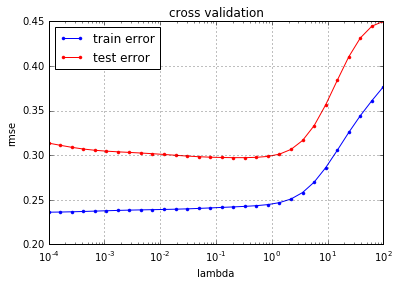

In [5]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 6
    k_fold = 4
    lambdas = np.logspace(-4, 2, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # cross validation
    # ***************************************************
    for lamb in lambdas:
        rmse_tr_lamb = []
        rmse_te_lamb = []
        for k in np.r_[1:k_fold+1]:
            loss_tr,loss_te = cross_validation(y, x, k_indices, k, lamb, degree)
            rmse_tr_lamb = np.r_[rmse_tr_lamb, loss_tr]
            rmse_te_lamb = np.r_[rmse_te_lamb, loss_te]
        rmse_tr = np.r_[rmse_tr,np.mean(rmse_tr_lamb)]
        rmse_te = np.r_[rmse_te,np.mean(rmse_te_lamb)]
        
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)
    
cross_validation_demo()

In [6]:
for ind,degree in enumerate(range(1,10)):
    print("ind = {i}, deg = {d}".format(i=ind,d=degree))

ind = 0, deg = 1
ind = 1, deg = 2
ind = 2, deg = 3
ind = 3, deg = 4
ind = 4, deg = 5
ind = 5, deg = 6
ind = 6, deg = 7
ind = 7, deg = 8
ind = 8, deg = 9


## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

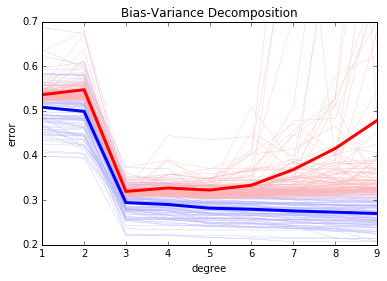

In [7]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # split data with a specific seed
        # ***************************************************
        tr_idx, te_idx = split_data(x,y,ratio_train,seed)
        te_x = x[te_idx]
        te_y = y[te_idx]
        tr_x = x[tr_idx]
        tr_y = y[tr_idx]
        # ***************************************************
        # bias_variance_decomposition
        # ***************************************************
        for index_degree,degree in enumerate(degrees):
            # ***************************************************
            # form data with polynomial degree
            # ***************************************************
            te_phi = build_poly(te_x,degree-1)
            tr_phi = build_poly(tr_x,degree-1)
            # ***************************************************
            # ridge regression
            # ***************************************************
            weight,mse = least_squares(tr_y, tr_phi)
            # ***************************************************
            # calculate the loss for train and test data
            # ***************************************************
            loss_tr = np.sqrt(2*mse)
            loss_te = np.sqrt(2*compute_mse(te_y, te_phi, weight))
            rmse_tr[index_seed,index_degree]=loss_tr
            rmse_te[index_seed,index_degree]=loss_te
        
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()